In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancer_dataset.csv to cancer_dataset.csv


In [4]:
df=pd.read_csv('cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.dropna(axis=1,how='all',inplace=True)
df.head()
df.shape

(569, 32)

Lets understand data first.
By Plotting pairplot, we will see how a feature is related to another wrt to the target feature.

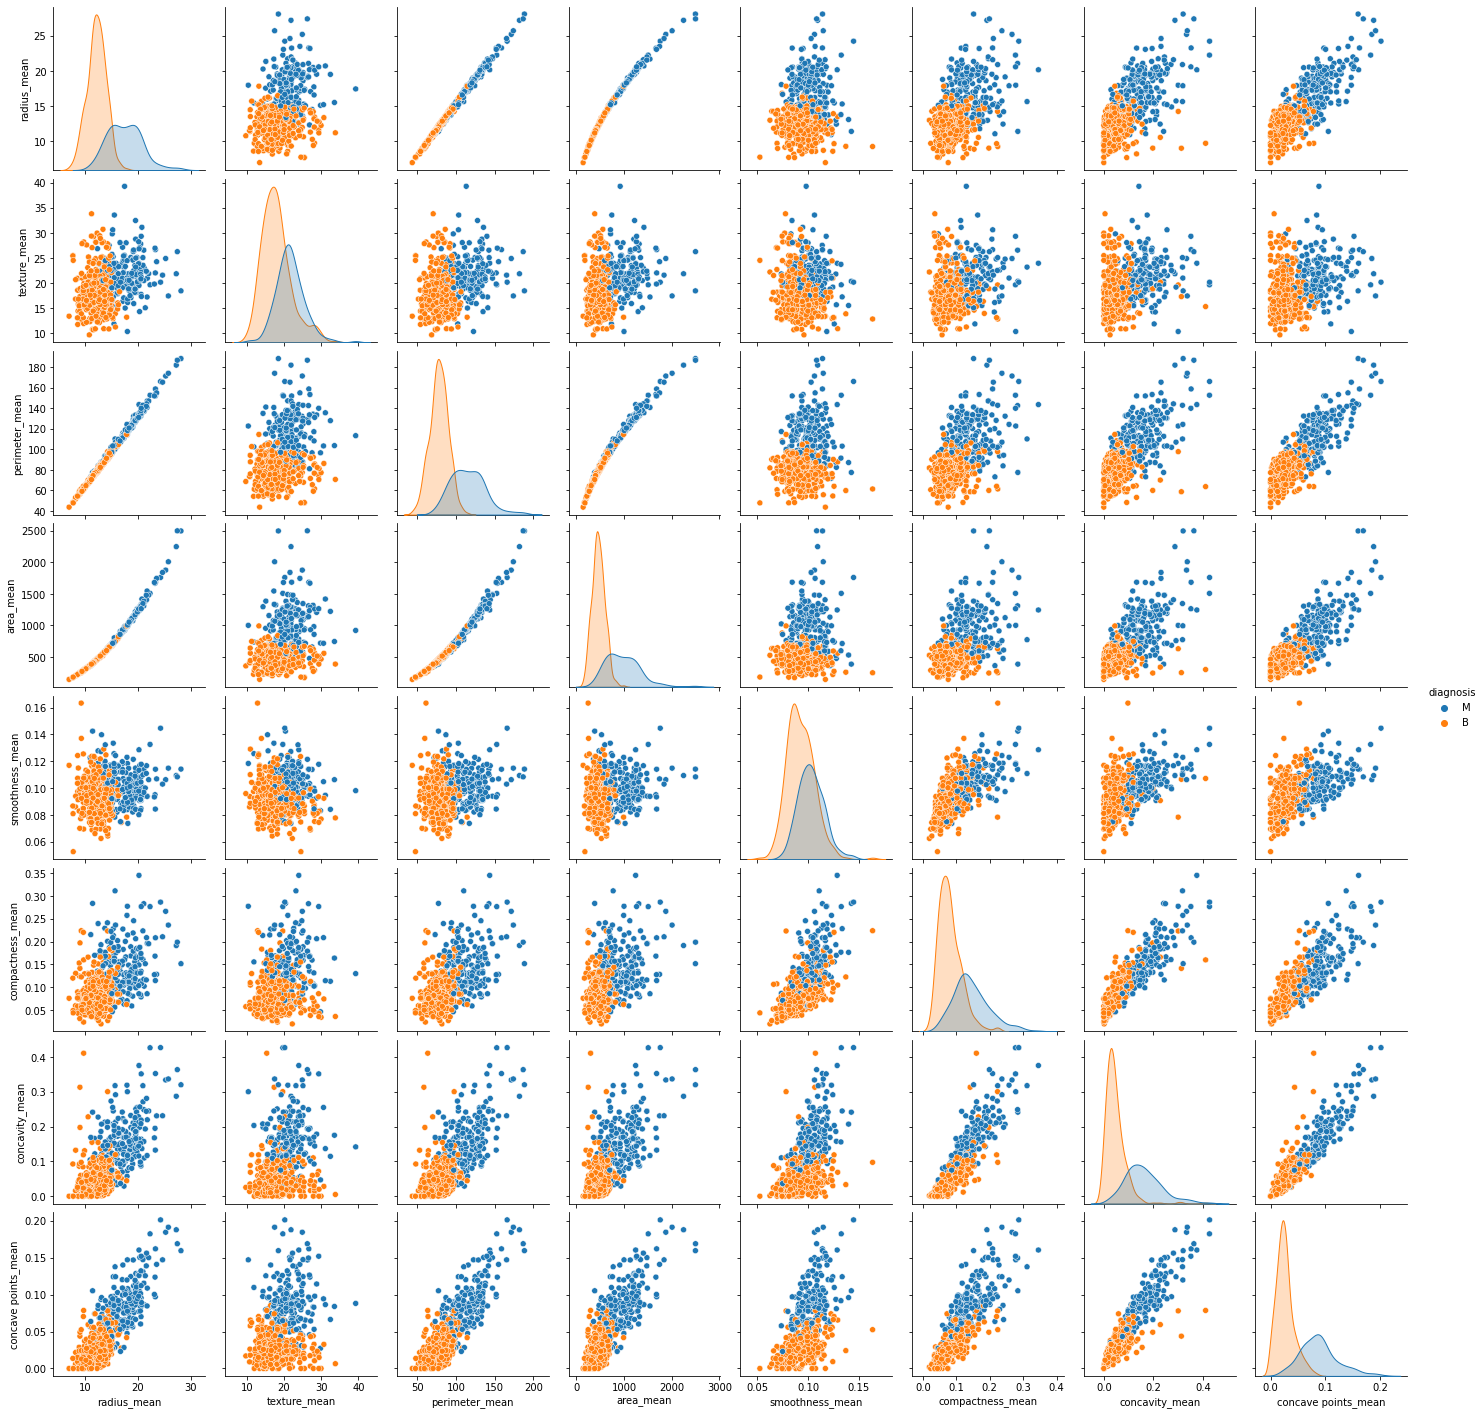

In [6]:
import seaborn as sns
sns.pairplot(data=df.iloc[:,1:10], hue='diagnosis', dropna=True, diag_kind='auto')


By Visualization , one thing is clear that there is no clear margin between the data points. points are very overalpping. Let's try different different models for same, but first lets try different cross validations to check accuracy. Lets select SVC as our model first.

In [6]:
dataset=df.iloc[:,2:]
target=df.iloc[:,1]
dataset.head()
target.head()


0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [8]:
dataset.isnull().sum()


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

First Cross validation method - **HoldOut Validation Approach- Train And Test Split**

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [9]:

X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.30, random_state=4)
model = svm.SVC(kernel='rbf',C=10)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.8771929824561403


Upon changing value of random state or test size the accuracy % will go on changing plus this randomly distributes data and there is no equal distribution of data wrt to target between test and train. This will be a problem. In order to solve First problem we have another one - **K Fold Cross Validation ***. KFold will check the accuray by dividing data into k sets where test data will always be n/k. Accuracy is predicted for each fold and then their average accuray will be said to be accuracy of the same model.

In [9]:
import numpy as np
kFold_val=KFold(10)
result_score=cross_val_score(estimator=model,X=dataset,y=target, cv=kFold_val )
print(result_score)
print(np.mean(result_score))

[0.77192982 0.9122807  0.92982456 0.84210526 0.96491228 0.96491228
 0.9122807  0.98245614 0.9122807  0.98214286]
0.9175125313283207


Cross Validation , never says which model will give you the best accuracy , it only shows how selected model is performing over the test-train data. The problem with k-fold is the percentage of differenct classes is not equally distributed between the train test data at each fold. Eg, See first result score i.e. 77% and last : 98%. There is huge difference between them. In order to solve this we have **Stratified KFold CrossValidation** -This make sure that each split has atleast comparable fraction of all the possible target values. 

In [14]:
from sklearn.model_selection import StratifiedKFold
skFold_val=StratifiedKFold(10)
result_score=cross_val_score(estimator=model,X=dataset,y=target, cv=skFold_val )
print(result_score)
print(np.mean(result_score))

[0.87719298 0.87719298 0.89473684 0.94736842 0.94736842 0.87719298
 0.96491228 0.92982456 0.92982456 0.94642857]
0.9192042606516291


**Repeated Random Test-Train Splits** : -
This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method. In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [16]:
from sklearn.model_selection import ShuffleSplit

ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X=dataset,y=target,cv=ssplit)
print(results)
print(np.mean(results))

[0.90643275 0.92982456 0.9122807  0.92982456 0.94736842 0.9122807
 0.91812865 0.9005848  0.92982456 0.92982456]
0.9216374269005847


This was about Cross Validations, There is one more in the list which is  ***Leave One out CV *** - Rarely used now days because of slow performance.

###Hyper Parameter Tuning 
This is the Process of choosing optimal parameter.
Lets see how this can be done manual. Obviously, Manually this will be a tedious process.

In [10]:
model_1=svm.SVC(kernel='rbf',C=10,gamma='auto')
model_2=svm.SVC(kernel='rbf',C=20,gamma='auto')
model_3=svm.SVC(kernel='rbf',C=15,gamma='auto')
model_4=svm.SVC(kernel='linear',C=20,gamma='auto')
model_5=svm.SVC(kernel='poly',C=10,gamma='auto')



In [11]:
results={}
kFold_val=KFold(5)
results['Model_1']=cross_val_score(model_1,X=dataset,y=target,cv=kFold_val)
results['Model_2']=cross_val_score(model_2,X=dataset,y=target,cv=kFold_val)
results['Model_3']=cross_val_score(model_3,X=dataset,y=target,cv=kFold_val)
results['Model_4']=cross_val_score(model_4,X=dataset,y=target,cv=kFold_val)
#results['Model_5']=cross_val_score(model_5,X=dataset,y=target,cv=kFold_val)

print(results)


{'Model_1': array([0.40350877, 0.57017544, 0.64912281, 0.74561404, 0.7699115 ]), 'Model_2': array([0.40350877, 0.57017544, 0.64912281, 0.74561404, 0.7699115 ]), 'Model_3': array([0.40350877, 0.57017544, 0.64912281, 0.74561404, 0.7699115 ]), 'Model_4': array([0.93859649, 0.93859649, 0.96491228, 0.96491228, 0.94690265])}


Lets try this using loop. 

In [19]:
import numpy as np 
kernels=['rbf','linear']
C=[1,10,20]
avg_scores={}
kFold_val=KFold(5)
for kernel in kernels:
    for cVal in C:
        cv_scores=cross_val_score(svm.SVC(kernel=kernel,C=cVal,gamma='auto'),X=dataset,y=target, cv=kFold_val)
        avg_scores[kernel+'_'+str(cVal)]=np.mean(cv_scores)
for i in avg_scores:
    print(i , avg_scores[i])

rbf_1 0.6276665114112715
rbf_10 0.6276665114112715
rbf_20 0.6276665114112715
linear_1 0.9525384257102933
linear_10 0.9455208818506444
linear_20 0.9507840397453812


###GridSearch Cross Validation
This is an sklearn api for showing performance of different models.
Internally, it uses KFold CV


In [21]:
from sklearn.model_selection import GridSearchCV

In [28]:
clf=GridSearchCV(svm.SVC(gamma='auto'),
          {
              'C':[1,10,20],
              'kernel': ['rbf','linear']
          }, cv=5, return_train_score=False
          )
clf.fit(dataset,target)
cv_score_df=pd.DataFrame(clf.cv_results_)
print(cv_score_df)
print(cv_score_df[['param_C','param_kernel','mean_test_score']])

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.014996      0.001367  ...        0.003949                4
1       1.309173      0.287356  ...        0.018689                3
2       0.014559      0.000135  ...        0.003949                4
3       2.384126      0.336738  ...        0.015238                1
4       0.014804      0.000175  ...        0.003949                4
5       3.939428      0.841964  ...        0.015238                1

[6 rows x 15 columns]
  param_C param_kernel  mean_test_score
0       1          rbf         0.627418
1       1       linear         0.945536
2      10          rbf         0.627418
3      10       linear         0.950815
4      20          rbf         0.627418
5      20       linear         0.950815


From the above DF we can conclude that for this dataset, and SVM model, the best parameters are kernel='linear' and C=10 or 20, providing accuarcy of 95%. Same can be deduced with clf attributes: 
clf.best_params_
clf.best_score_

In [29]:
print("Best score : ", clf.best_score_)
print("Best Parameter : ",clf.best_params_)

Best score :  0.9508150908244062
Best Parameter :  {'C': 10, 'kernel': 'linear'}


Drawback of GridSearch Cv :  When you have lots of params and their lots of value this becomes a slow process, as it for each parameter it tries all the PnC for rest of the parameters. To overcome this we have **RandomizedSearch CV ** . This will select random parameter values. You can specify number of iterations you want by defining parm : n_iter.

In [9]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(
    svm.SVC(gamma='auto'),
    {
        'C':[1,10,20],
        'kernel':['rbf','linear']
    }, cv=5, return_train_score=False,
    n_iter=3
)
rs.fit(dataset,target)

cv_score_df=pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]
print(cv_score_df)


  param_C param_kernel  mean_test_score
0       1          rbf         0.627418
1      10       linear         0.950815
2      20          rbf         0.627418


### How to select Optimal Model for your classification.
Lets select 4 models and see the accuracy % on it.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
model_params={
    'svm' : {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C':[10,20],
            'kernel':['rbf','linear']
        }
    },
   'RandomForest': {
       'model': RandomForestClassifier(),
       'params': {
            'n_estimators':[5,10,2]
          } 
      },
    'Logistic Regression': {
       'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
       'params': {
              'C' : [1,10,20]
            }
        }
    }

In [15]:
scores=[]
for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_iter=3)
    clf.fit(dataset, target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.950815,"{'kernel': 'linear', 'C': 10}"
1,RandomForest,0.950815,{'n_estimators': 10}
2,Logistic Regression,0.952569,{'C': 1}
